In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import matplotlib.animation as animation
from IPython.display import HTML
from LennardJones import LennardJones
plt.rcParams['figure.dpi'] = 300  
plt.rcParams['animation.embed_limit'] = 30

In [2]:
N = 100
radius = 0.3
L = 10
duration = 50 
nsteps = 5000
dt = duration/nsteps  
T0 = 0.01 # target temperature
v0 = 3.5 # initial velocity
tau = 2

particle_index = np.random.randint(0, N) # index of the particle to track


lj = LennardJones(N, L, radius, duration, nsteps, v0)

all_positions, all_velocities = lj.animate(T0=T0, tau=tau)


In [3]:
speeds=np.linalg.norm(all_velocities,axis=2)
normalized_speeds = (speeds-np.min(speeds)/1.5*v0-np.min(speeds))

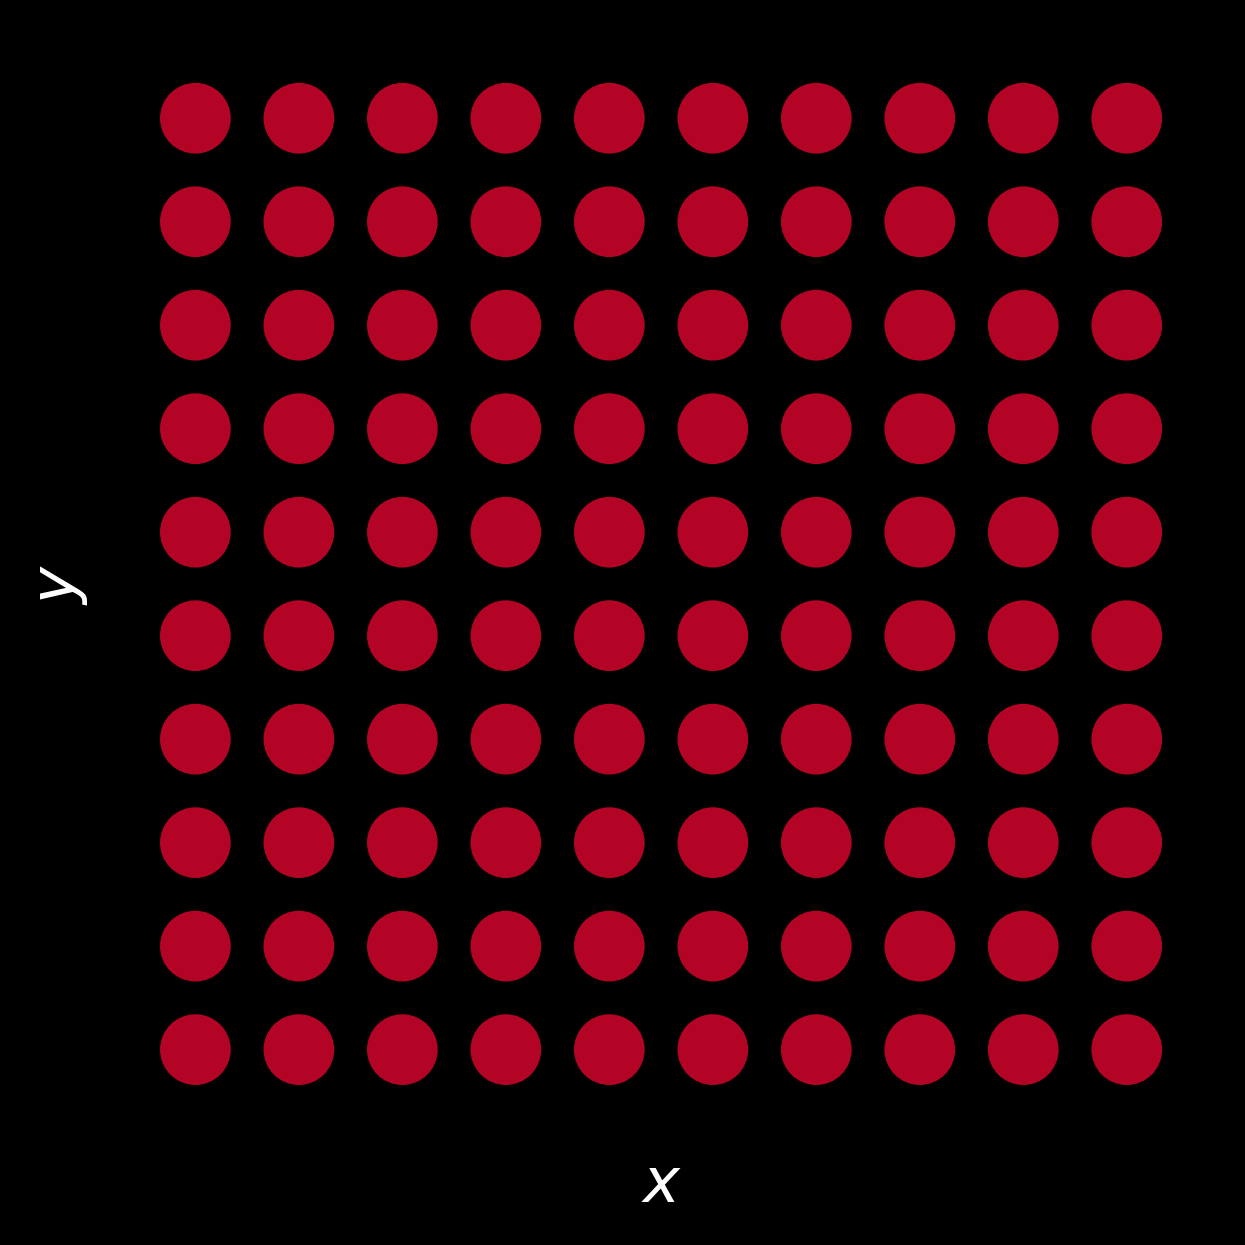

In [4]:
fig,ax = plt.subplots()

# Set the background color to black
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

def animate_positions(frame):
    ax.clear()
    # Set the background color to black for each frame
    ax.set_facecolor('black')
    for i in range(N):
        x, y = (all_positions[frame,i, 0])%L, (all_positions[frame, i, 1])%L
        color = plt.cm.coolwarm(normalized_speeds[frame,i])
        circle = plt.Circle((x, y),radius, fill=True, color=color)
        ax.add_artist(circle)

    ax.set_xlabel('$x$', fontsize=15, color='white')
    ax.set_ylabel('$y$', fontsize=15, color='white')
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_aspect('equal')
    ax.set_xticks([]) #remove ticks
    ax.set_yticks([])

interval = duration*1e3/nsteps
ani = animation.FuncAnimation(fig, animate_positions, frames=nsteps, interval=interval)
ani.save('lennard_jones_crystalization.mp4', writer='ffmpeg')